<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

__How can we optimize for the best chance of gaining admission to the best possible university?__

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

Still, pre tertiary admission tests are a signal of a prospective student's intellectual capacity and are necessary given the scarcity of placements in top universities. Test scores (of all types including university grades) act as signals to employers as well.

### Choose your Data

For this analysis, we will be using SAT and ACT scores, as well as the ranges of accepted ACT/SAT student scores by colleges
* act_2017
* act_2018
* act_2019
* sat_2017
* sat_2018
* sat_2019
* sat_act_by_college

These datasets are then cleaned and merged to conduct cross-sectional and time series analysis. The resulting datasets used are:
* merged_scores_{} : {2017, 2018, 2019, all}
* sat_act_by_college

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
def mean(list):
    return sum(list) / len(list)

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Population Standard Deviation

def std_dev(list):
    x = 0
    for y in list:
        x += (y - mean(list)) ** 2
    std_dev1 = ((1/len(list)) * x) ** (1/2)
    return std_dev1

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
def str_to_float(string):
    try: 
        output = round(float(string.strip('%')) / 100, 4)
    except:
        output = 0
    return output

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as stats
import seaborn as sns
from IPython.display import display

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

__Import data files__

In [5]:
file_list = ['act_2017.csv', 'act_2018.csv', 'act_2019.csv', 'sat_2017.csv', 'sat_2018.csv', 'sat_2019.csv', 'sat_2019_by_intended_college_major.csv', 'sat_act_by_college.csv']

# Loop to import list of files with defined variable names
# globals function to format string into global variable for use later on

for x in file_list:
    globals()[f'{x.replace(".csv","")}'] = pd.read_csv('../data/{}'.format(x))

1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.

In [6]:
# Displaying data

display(sat_2019.head())
display(act_2019.head())
display(act_2018.head())
display(act_2018.head())
display(act_2017.head())
display(act_2017.head())
display(sat_act_by_college.head())

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.30%,1440-1570,32-35
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.70%,1460-1580,33-35
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.50%,1440-1570,32-35
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,5.50%,1450-1560,33-35
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,6.10%,1460-1570,33-35


2. Check for missing values.
<br> *Ignore 'Applies to Class Year(s)' since we will not be using it*

In [7]:
# Check for null values

display(act_2019.isnull().sum())
display(sat_2019.isnull().sum())
display(act_2018.isnull().sum())
display(sat_2018.isnull().sum())
display(act_2017.isnull().sum())
display(sat_2017.isnull().sum())
display(sat_act_by_college.isnull().sum())


State            0
Participation    0
Composite        0
dtype: int64

State                 0
Participation Rate    0
EBRW                  0
Math                  0
Total                 0
dtype: int64

State            0
Participation    0
Composite        0
dtype: int64

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

School                             0
Test Optional?                     0
Applies to Class Year(s)          26
Policy Details                     0
Number of Applicants               0
Accept Rate                        0
SAT Total 25th-75th Percentile     0
ACT Total 25th-75th Percentile     0
dtype: int64

3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
<br> _Data looks consistent_

In [8]:
display(act_2019.describe())
display(sat_2019.describe())
display(act_2018.describe())
display(sat_2018.describe())
display(act_2017.describe())
display(sat_2017.describe())
display(sat_act_by_college.describe())

,Composite
count,52.000000
mean,21.450000
std,2.175487
min,17.900000
25%,19.800000
50%,20.950000
75%,23.650000
max,25.500000


,EBRW,Math,Total
count,53.000000,53.000000,53.000000
mean,558.000000,548.471698,1106.528302
std,47.554422,53.785044,100.994784
min,483.000000,445.000000,935.000000
25%,518.000000,506.000000,1024.000000
50%,550.000000,545.000000,1097.000000
75%,610.000000,596.000000,1200.000000
max,636.000000,648.000000,1284.000000


,Composite
count,52.000000
mean,21.544231
std,2.119417
min,17.700000
25%,19.975000
50%,21.300000
75%,23.725000
max,25.600000


,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


,Number of Applicants
count,416.000000
mean,17481.759615
std,17447.621897
min,211.000000
25%,5313.000000
50%,11622.000000
75%,23599.750000
max,111322.000000


5. Display the data types of each feature.

In [9]:
# Display data types

display(act_2019.info())
display(sat_2019.info())
display(act_2018.info())
display(sat_2018.info())
display(act_2017.info())
display(sat_2017.info())
display(sat_act_by_college.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   School                          416 non-null    object
 1   Test Optional?                  416 non-null    object
 2   Applies to Class Year(s)        390 non-null    object
 3   Policy Details                  416 non-null    object
 4   Number of Applicants            416 non-null    int64 
 5   Accept Rate                     416 non-null    object
 6   SAT Total 25th-75th Percentile  416 non-null    object
 7   ACT Total 25th-75th Percentile  416 non-null    object
dtypes: int64(1), object(7)
memory usage: 26.1+ KB


None

6. Fix any incorrect data types found in step 5
<br> _Convert string/object to float_
<br> _Convert string ranges to individual columns with float_

In [10]:
# Convert str to float

# 2019 test scores
act_2019['Participation'] = act_2019['Participation'].map(str_to_float)
sat_2019['Participation Rate'] = sat_2019['Participation Rate'].map(str_to_float)

# 2018 test scores
act_2018['Participation'] = act_2018['Participation'].map(str_to_float)
sat_2018['Participation'] = sat_2018['Participation'].map(str_to_float)

# 2017 test scores
act_2017['Participation'] = act_2017['Participation'].map(str_to_float)
act_2017['Composite'] = pd.to_numeric(act_2017['Composite'], errors='coerce') # act_2017 Composite dtype changed from object to float
sat_2017['Participation'] = sat_2017['Participation'].map(str_to_float)

# Test scores by college
sat_act_by_college['Accept Rate'] = sat_act_by_college['Accept Rate'].map(str_to_float)


In [11]:
# Clean sat_act_by_college
# Split the SAT and ACT score ranges into individual columns and convert to float dtype

# Create new columns

sat_act_by_college['sat_25th_percentile'] = 0
sat_act_by_college['sat_75th_percentile'] = 0
sat_act_by_college['act_25th_percentile'] = 0
sat_act_by_college['act_75th_percentile'] = 0

# Split ranges into individual columns

for x in range(len(sat_act_by_college)):
    sat_act_by_college['sat_25th_percentile'][x] = sat_act_by_college['SAT Total 25th-75th Percentile'][x].split('-')[0]
    sat_act_by_college['act_25th_percentile'][x] = sat_act_by_college['ACT Total 25th-75th Percentile'][x].split('-')[0]

for x in range(len(sat_act_by_college)):
    sat_act_by_college['sat_75th_percentile'][x] = sat_act_by_college['SAT Total 25th-75th Percentile'][x].split('-')[1]
    sat_act_by_college['act_75th_percentile'][x] = sat_act_by_college['ACT Total 25th-75th Percentile'][x].split('-')[1]

# Convert object dtype to float

sat_act_by_college['sat_25th_percentile'] = pd.to_numeric(sat_act_by_college['sat_25th_percentile'], errors='coerce')
sat_act_by_college['sat_75th_percentile'] = pd.to_numeric(sat_act_by_college['sat_75th_percentile'], errors='coerce')
sat_act_by_college['act_25th_percentile'] = pd.to_numeric(sat_act_by_college['act_25th_percentile'], errors='coerce')
sat_act_by_college['act_75th_percentile'] = pd.to_numeric(sat_act_by_college['act_75th_percentile'], errors='coerce')

# Drop useless columns

sat_act_by_college.drop(['SAT Total 25th-75th Percentile', 'ACT Total 25th-75th Percentile'], axis=1, inplace=True)

sat_act_by_college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   School                    416 non-null    object 
 1   Test Optional?            416 non-null    object 
 2   Applies to Class Year(s)  390 non-null    object 
 3   Policy Details            416 non-null    object 
 4   Number of Applicants      416 non-null    int64  
 5   Accept Rate               416 non-null    float64
 6   sat_25th_percentile       410 non-null    float64
 7   sat_75th_percentile       410 non-null    float64
 8   act_25th_percentile       410 non-null    float64
 9   act_75th_percentile       410 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 32.6+ KB


/Users/eugenekhoo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/eugenekhoo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/eugenekhoo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

7. Rename Columns.
<br> _Convert all to lower case and replace spaces with underscore_
<br> _Rename columns to to prep for merge_

In [12]:
# Rename columns to lower case, replace spaces with underscore

# 2019 test scores
sat_2019.columns = sat_2019.columns.str.lower().str.replace(' ','_')
act_2019.columns = act_2019.columns.str.lower().str.replace(' ','_')

# 2018 test scores
sat_2018.columns = sat_2018.columns.str.lower().str.replace(' ','_')
act_2018.columns = act_2018.columns.str.lower().str.replace(' ','_')

#2017 test scores
sat_2017.columns = sat_2017.columns.str.lower().str.replace(' ','_')
act_2017.columns = act_2017.columns.str.lower().str.replace(' ','_')

# Test scores by college
sat_act_by_college.columns = sat_act_by_college.columns.str.lower().str.replace(' ','_')

In [13]:
# Rename columns to avoid duplicate column names after merging

sat_2019.rename(columns={
    'ebrw' : 'sat_ebrw',
    'math' : 'sat_math',
    'total' : 'sat_total',
    'participation_rate' : 'sat_participation',
},inplace=True)

sat_2018.rename(columns={
    'evidence-based_reading_and_writing' : 'sat_ebrw',
    'math' : 'sat_math',
    'total' : 'sat_total',
    'participation' : 'sat_participation',
},inplace=True)

sat_2017.rename(columns={
    'evidence-based_reading_and_writing' : 'sat_ebrw',
    'math' : 'sat_math',
    'total' : 'sat_total',
    'participation' : 'sat_participation',
},inplace=True)

act_2019.rename(columns={
    'composite' : 'act_composite',
    'participation' : 'act_participation'
},inplace=True)

act_2018.rename(columns={
    'composite' : 'act_composite',
    'participation' : 'act_participation'
},inplace=True)

act_2017.rename(columns={
    'composite' : 'act_composite',
    'participation' : 'act_participation'
},inplace=True)

# Drop extra test scores in act_2017

act_2017.drop(['english','math','reading','science'], axis=1, inplace=True)

9. Merge dataframes that can be merged.
<br> _Merge test scores cross-sectionally then by time_

In [14]:
# Merge SAT and ACT scores - cross sectional

merged_scores_2019 = pd.merge(sat_2019, act_2019)
merged_scores_2018 = pd.merge(sat_2018, act_2018)
merged_scores_2017 = pd.merge(sat_2017, act_2017)


In [15]:
# Add date column and concatenate merged_score tables

merged_scores_2019['year'] = pd.to_datetime('2019-01-01')
merged_scores_2018['year'] = pd.to_datetime('2018-01-01')
merged_scores_2017['year'] = pd.to_datetime('2017-01-01')


# Concatenate merged_scores to create 'timeseries'

merged_scores_all = pd.concat([merged_scores_2017, merged_scores_2018, merged_scores_2019], ignore_index=True)
merged_scores_all['year'] = merged_scores_all.year.dt.year # Converting datetime format to int for cleaner presentation

In [16]:
display(merged_scores_2019.info())
display(merged_scores_all.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   state              51 non-null     object        
 1   sat_participation  51 non-null     float64       
 2   sat_ebrw           51 non-null     int64         
 3   sat_math           51 non-null     int64         
 4   sat_total          51 non-null     int64         
 5   act_participation  51 non-null     float64       
 6   act_composite      51 non-null     float64       
 7   year               51 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 3.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              153 non-null    object 
 1   sat_participation  153 non-null    float64
 2   sat_ebrw           153 non-null    int64  
 3   sat_math           153 non-null    int64  
 4   sat_total          153 non-null    int64  
 5   act_participation  153 non-null    float64
 6   act_composite      152 non-null    float64
 7   year               153 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 9.7+ KB


None

10. Perform any additional cleaning that you feel is necessary.
<br> _Create a dictionary to display the number of schools that the average student in each state 'qualifies' for_
<br> _'Qualifies' defined by: test score > 25th percentile score_
<br> _Refer to this statistic as 'School Qualification Count'_

In [17]:
# Identify the admission prospects of students by state and test type

# Create a dictionary to store the number of schools where students from each state meet the 25th percentile threshold (proxy for admission)

# Create empty dictionary
prospective_students_sat = {}
prospective_students_act = {}

# Populate dictionary with key: state, value: zero
for state in merged_scores_2019['state']:
    prospective_students_sat[state] = 0
    prospective_students_act[state] = 0

# Find the number of schools where the average test score is greater than or equal to the 25th percentile scores

for state in prospective_students_sat.keys():
    for school in sat_act_by_college['school']:
        if merged_scores_2019.loc[merged_scores_2019['state'] == state].sat_total.values >= sat_act_by_college.loc[sat_act_by_college['school'] == school].sat_25th_percentile.values:
            prospective_students_sat[state] += 1

for state in prospective_students_act.keys():
    for school in sat_act_by_college['school']:
        if merged_scores_2019.loc[merged_scores_2019['state'] == state].act_composite.values >= sat_act_by_college.loc[sat_act_by_college['school'] == school].act_25th_percentile.values:
            prospective_students_act[state] += 1            

display(prospective_students_sat)
display(prospective_students_act)

{'Alabama': 198,
 'Alaska': 136,
 'Arizona': 185,
 'Arkansas': 196,
 'California': 92,
 'Colorado': 47,
 'Connecticut': 70,
 'Delaware': 14,
 'District of Columbia': 12,
 'Florida': 26,
 'Georgia': 82,
 'Hawaii': 147,
 'Idaho': 26,
 'Illinois': 42,
 'Indiana': 127,
 'Iowa': 302,
 'Kansas': 302,
 'Kentucky': 292,
 'Louisiana': 266,
 'Maine': 42,
 'Maryland': 82,
 'Massachusetts': 172,
 'Michigan': 31,
 'Minnesota': 332,
 'Mississippi': 292,
 'Missouri': 292,
 'Montana': 257,
 'Nebraska': 317,
 'Nevada': 214,
 'New Hampshire': 82,
 'New Jersey': 136,
 'New Mexico': 112,
 'New York': 92,
 'North Carolina': 147,
 'North Dakota': 317,
 'Ohio': 136,
 'Oklahoma': 11,
 'Oregon': 159,
 'Pennsylvania': 127,
 'Rhode Island': 26,
 'South Carolina': 57,
 'South Dakota': 317,
 'Tennessee': 286,
 'Texas': 47,
 'Utah': 292,
 'Vermont': 147,
 'Virginia': 159,
 'Washington': 112,
 'West Virginia': 7,
 'Wisconsin': 332,
 'Wyoming': 292}

{'Alabama': 17,
 'Alaska': 60,
 'Arizona': 37,
 'Arkansas': 38,
 'California': 141,
 'Colorado': 176,
 'Connecticut': 250,
 'Delaware': 210,
 'District of Columbia': 176,
 'Florida': 60,
 'Georgia': 90,
 'Hawaii': 37,
 'Idaho': 141,
 'Illinois': 210,
 'Indiana': 141,
 'Iowa': 90,
 'Kansas': 90,
 'Kentucky': 38,
 'Louisiana': 17,
 'Maine': 210,
 'Maryland': 141,
 'Massachusetts': 250,
 'Michigan': 210,
 'Minnesota': 90,
 'Mississippi': 17,
 'Missouri': 60,
 'Montana': 38,
 'Nebraska': 60,
 'Nevada': 13,
 'New Hampshire': 250,
 'New Jersey': 210,
 'New Mexico': 38,
 'New York': 210,
 'North Carolina': 37,
 'North Dakota': 38,
 'Ohio': 60,
 'Oklahoma': 17,
 'Oregon': 90,
 'Pennsylvania': 176,
 'Rhode Island': 210,
 'South Carolina': 17,
 'South Dakota': 90,
 'Tennessee': 38,
 'Texas': 60,
 'Utah': 60,
 'Vermont': 210,
 'Virginia': 210,
 'Washington': 141,
 'West Virginia': 60,
 'Wisconsin': 60,
 'Wyoming': 38}

11. Save your cleaned and merged dataframes as csv files.

In [18]:
merged_scores_all.to_csv(r'../data/merged_scores_all.csv')
sat_act_by_college.to_csv(r'../data/sat_act_by_college_clean.csv')

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.


|Feature|Type|Dataset|Description|
|---|---|---|---|
|__state__|object|merged_scores_{}|State|
|__sat_ebrw__|int|merged_scores_{}|(SAT) Evidence-Based Reading and Writing|
|__sat_math__|int|merged_scores_{}|(SAT) Math|
|__sat_total__|int|merged_scores_{}|Total SAT Score|
|__sat_participation__|float|merged_scores_{}|SAT Participation Rate (by Seniors)|
|__act_composite__|float|merged_scores_{}|ACT Composite Scores|
|__act_participation__|float|merged_scores_{}|ACT Participation Rate (by Seniors)|
|__school__|object|sat_act_by_college|University name|
|__number_of_applicants__|float|sat_act_by_college|Number of applicants|
|__accept_rate__|float|sat_act_by_college|Acceptance rate|
|__sat_25th_percentile__|float|sat_act_by_college|SAT score at 25th percentile|
|__sat_75th_percentile__|float|sat_act_by_college|SAT score at 75th percentile|
|__act_25th_percentile__|float|sat_act_by_college|ACT score at 25th percentile|
|__act_75th_percentile__|float|sat_act_by_college|ACT score at 75th percentile|


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

1. Summary Statistics.

In [19]:
display(merged_scores_2019.describe()) # ignore year (converted from datetime to int)
display(sat_act_by_college.describe())

,sat_participation,sat_ebrw,sat_math,sat_total,act_participation,act_composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.490588,560.803922,552.196078,1113.078431,0.586667,21.464706
std,0.387476,46.248035,51.290553,97.197910,0.345159,2.194523
min,0.020000,483.000000,460.000000,943.000000,0.060000,17.900000
25%,0.055000,527.500000,511.500000,1038.000000,0.245000,19.800000
50%,0.540000,550.000000,546.000000,1097.000000,0.540000,21.100000
75%,0.820000,612.000000,599.000000,1210.000000,1.000000,23.700000
max,1.000000,636.000000,648.000000,1284.000000,1.000000,25.500000


,number_of_applicants,accept_rate,sat_25th_percentile,sat_75th_percentile,act_25th_percentile,act_75th_percentile
count,416.000000,416.000000,410.000000,410.000000,410.000000,410.000000
mean,17481.759615,0.557034,1167.008537,1358.892683,24.712927,29.889756
std,17447.621897,0.242117,129.586121,111.431443,4.127758,3.154675
min,211.000000,0.043000,793.000000,1050.000000,15.000000,19.000000
25%,5313.000000,0.376250,1070.000000,1270.000000,22.000000,28.000000
50%,11622.000000,0.613000,1150.000000,1350.000000,24.000000,30.000000
75%,23599.750000,0.742250,1250.000000,1440.000000,28.000000,32.000000
max,111322.000000,0.999000,1530.000000,1580.000000,35.000000,36.000000


2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.

In [20]:
# Standard Deviation Dictionary for year 2019

sd = {
    'SAT_EBRW' : std_dev(merged_scores_2019['sat_ebrw']),
    'SAT_Math' : std_dev(merged_scores_2019['sat_math']),
    'SAT_Total' : std_dev(merged_scores_2019['sat_total']),
    'ACT_Composite' : std_dev(merged_scores_2019['act_composite'])
}



3. Investigate trends in the data.

_Highest and lowest participation rates and test scores_

In [21]:
# Create function to display max/min participation rates and test scores

def max_min_part_score(dataset):

    max_sat_part = max(dataset['sat_participation'])
    min_sat_part = min(dataset['sat_participation'])
    max_act_part = max(dataset['act_participation'])
    min_act_part = min(dataset['act_participation'])

    max_sat_score = max(dataset['sat_total'])
    min_sat_score = min(dataset['sat_total'])
    max_act_score = max(dataset['act_composite'])
    min_act_score = min(dataset['act_composite'])

    print(f'Max SAT Participation: {max_sat_part}\nStates: {list(dataset["state"][x] for x in range(len(dataset)) if dataset["sat_participation"][x] == max_sat_part)}')
    print(f'Min SAT Participation: {min_sat_part}\nStates: {list(dataset["state"][x] for x in range(len(dataset)) if dataset["sat_participation"][x] == min_sat_part)}')
    print(f'Max ACT Participation: {max_act_part}\nStates: {list(dataset["state"][x] for x in range(len(dataset)) if dataset["act_participation"][x] == max_act_part)}')
    print(f'Min ACT Participation: {min_act_part}\nStates: {list(dataset["state"][x] for x in range(len(dataset)) if dataset["act_participation"][x] == min_act_part)}')
    print(f'\n')
    print(f'Max SAT Score: {max_sat_score}\nStates: {list(dataset["state"][x] for x in range(len(dataset)) if dataset["sat_total"][x] == max_sat_score)}')
    print(f'Min SAT Score: {min_sat_score}\nStates: {list(dataset["state"][x] for x in range(len(dataset)) if dataset["sat_total"][x] == min_sat_score)}')
    print(f'Max ACT Score: {max_act_score}\nStates: {list(dataset["state"][x] for x in range(len(dataset)) if dataset["act_composite"][x] == max_act_score)}')
    print(f'Min ACT Score: {min_act_score}\nStates: {list(dataset["state"][x] for x in range(len(dataset)) if dataset["act_composite"][x] == min_act_score)}')

In [22]:
max_min_part_score(merged_scores_2019)

Max SAT Participation: 1.0
States: ['Colorado', 'Connecticut', 'Delaware', 'Florida', 'Idaho', 'Illinois', 'Michigan', 'Rhode Island']
Min SAT Participation: 0.02
States: ['North Dakota']
Max ACT Participation: 1.0
States: ['Alabama', 'Arkansas', 'Kentucky', 'Louisiana', 'Mississippi', 'Montana', 'Nebraska', 'Nevada', 'North Carolina', 'Ohio', 'Oklahoma', 'Tennessee', 'Utah', 'Wisconsin', 'Wyoming']
Min ACT Participation: 0.06
States: ['Maine']


Max SAT Score: 1284
States: ['Minnesota']
Min SAT Score: 943
States: ['West Virginia']
Max ACT Score: 25.5
States: ['Connecticut', 'Massachusetts']
Min ACT Score: 17.9
States: ['Nevada']


_Plot distribution of test scores_

Text(0.5, 1.0, 'Boxplot Distribution of SAT Scores by Year')

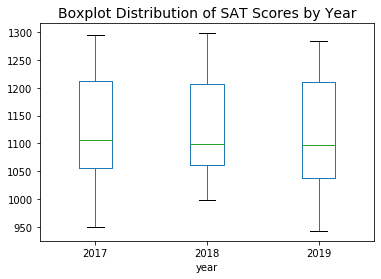

In [23]:
# Plot boxplot distribution of test scores

pivot_table_sat_total = pd.pivot_table(merged_scores_all, index='state',values='sat_total',columns='year')
boxplot_sat = pivot_table_sat_total.plot(kind='box')
boxplot_sat.set_xlabel('year')
boxplot_sat.set_title('Boxplot Distribution of SAT Scores by Year', size=14)

Text(0.5, 1.0, 'Boxplot Distribution of ACT Scores by Year')

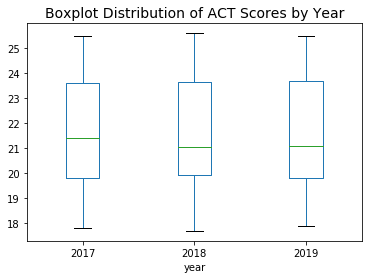

In [24]:
pivot_table_act_total = pd.pivot_table(merged_scores_all, index='state',values='act_composite',columns='year')
boxplot_act = pivot_table_act_total.plot(kind='box')
boxplot_act.set_xlabel('year')
boxplot_act.set_title('Boxplot Distribution of ACT Scores by Year', size=14)

Overall trends over time on a macro level...
<br> _SAT participation on average has increased between 2017-09. While participation rates for SAT have increased, the mean score has decreased_
<br> _ACT scores have also decreased with participation_

_Test scores have been falling year on year..regardless of participation implying Americans getting worse at admissions test_

In [25]:
merged_scores_all[['sat_total','sat_participation','act_composite','act_participation','year',]].groupby('year').mean()

,sat_total,sat_participation,act_composite,act_participation
year,,,,
2017,1126.098039,0.398039,21.546000,0.652549
2018,1120.725490,0.458824,21.503922,0.612353
2019,1113.078431,0.490588,21.464706,0.586667


_SAT and ACT scores have a negative correlation_
<br> _When choosing a state to study in, decide based on the test requirements of schools_

Text(0.5, 1, 'Test Score Correlation Matrix')

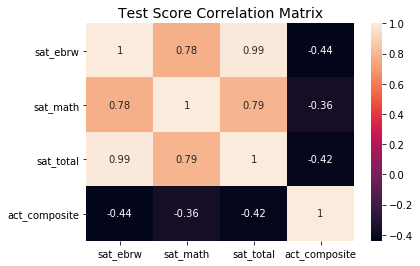

In [26]:
sat_act_corr = merged_scores_all[['sat_ebrw','sat_math','sat_total', 'act_composite']].corr()

corr_table = sns.heatmap(sat_act_corr, annot=True)
corr_table.set_yticklabels(labels=list(sat_act_corr.columns), rotation=0)
corr_table.set_title('Test Score Correlation Matrix', size=14)

_Test scores and participation rates have an inverse correlation_
<br> _Further steps: Investigate other factors that correlate with participation rate_

In [27]:
# Plot test scores against participation rate

def plot_score_vs_part(x_value, y_value, dataset): # inputs are column titles
    plt.scatter(x_value, y_value, data=dataset)
    
    # Estimate coefficient using OLS
    # Ensure no null values in dataset
    a, b = np.polyfit(dataset[x_value], dataset[y_value],1) 
    
    plt.plot(dataset[x_value], b+a*dataset[x_value], color='red') # plot trendline

Text(0, 0.5, 'ACT Score')

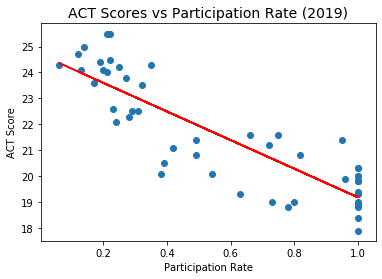

In [28]:
plot_score_vs_part('act_participation', 'act_composite', merged_scores_2019.dropna())
plt.title('ACT Scores vs Participation Rate (2019)', size=14)
plt.xlabel('Participation Rate')
plt.ylabel('ACT Score')

Text(0, 0.5, 'SAT Score')

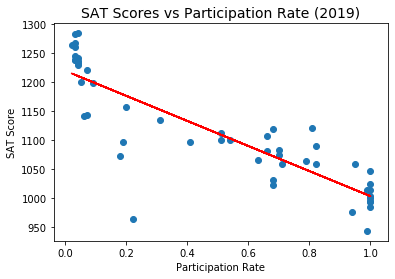

In [29]:
plot_score_vs_part('sat_participation', 'sat_total', merged_scores_2019.dropna()) 
plt.title('SAT Scores vs Participation Rate (2019)', size=14)
plt.xlabel('Participation Rate')
plt.ylabel('SAT Score')

Text(0, 0.5, 'ACT Participation Rate')

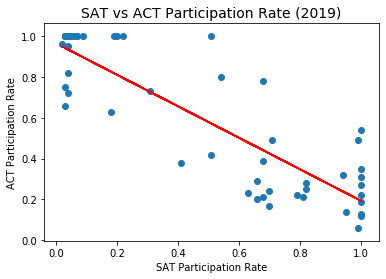

In [30]:
plot_score_vs_part('sat_participation', 'act_participation', merged_scores_2019.dropna()) 
plt.title('SAT vs ACT Participation Rate (2019)', size=14)
plt.xlabel('SAT Participation Rate')
plt.ylabel('ACT Participation Rate')

_Analyse the School Qualification Count_
<br> _Identify the percentage of schools qualified by the average propsective student (based on 25th percentile admission score)_
<br> _Since admission scores are only one portion of the selection criteria, a higher percentage could imply a higher probability of obtaining a spot at a school_

_The tables below show the states in which prospective students stand the best chance of being admitted to a school (assuming each state's test score is a function of its education system)_

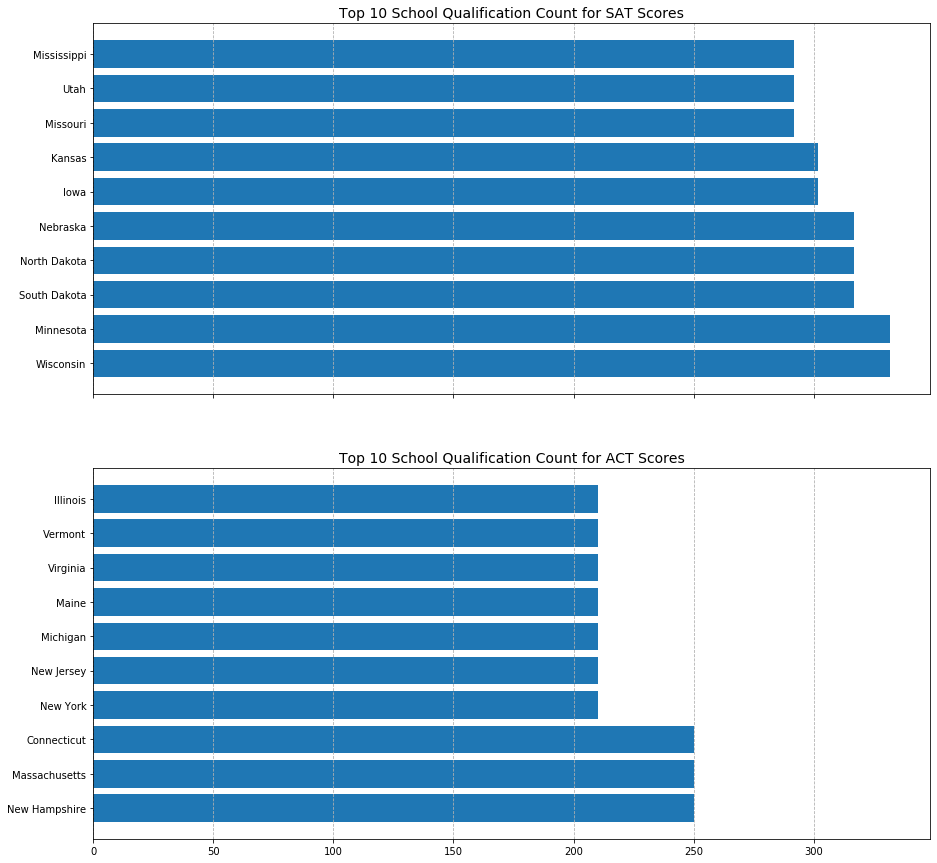

In [31]:
school_qualification_count = pd.DataFrame({'SAT' : pd.Series(prospective_students_sat), 'ACT' : pd.Series(prospective_students_act)})
school_qualification_count['Total'] = school_qualification_count['SAT'] + school_qualification_count['ACT']

fig, ax = plt.subplots(2, sharex=True)

fig.set_figheight(15)
fig.set_figwidth(15)

ax[0].barh(school_qualification_count.sort_values('SAT', ascending=False)['SAT'].head(10).index, school_qualification_count.sort_values('SAT', ascending=False)['SAT'].head(10).values)
ax[1].barh(school_qualification_count.sort_values('ACT', ascending=False)['ACT'].head(10).index, school_qualification_count.sort_values('ACT', ascending=False)['ACT'].head(10).values)

ax[0].set_title('Top 10 School Qualification Count for SAT Scores', size=14)
ax[1].set_title('Top 10 School Qualification Count for ACT Scores', size=14)

ax[0].grid(axis='x', linestyle='--')
ax[1].grid(axis='x', linestyle='--')

In [32]:
school_qualification_count.sort_values('SAT', ascending=False)['SAT'].head(10).index

Index(['Wisconsin', 'Minnesota', 'South Dakota', 'North Dakota', 'Nebraska',
       'Iowa', 'Kansas', 'Missouri', 'Utah', 'Mississippi'],
      dtype='object')

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Visualizations done with EDA

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

Given that test scores on average have been falling and with SAT/ACT scores negatively correlated, it might be wise for prospective students to be selective with the state in which they plan to undergo pre-tertiary education. We interpret low test scores as a proxy for a poor education system, although more analysis should be conducted to identify other factors (e.g. household income per capita, parent's education level, crime rates, etc.)

Nevertheless, for this exercise, we assume that a prospective student will end up being an average one. A prospective student also has limited time and resources and should pick an admissions test to focus on (although both have similar topics). We present the optimal state and admissions test to consider.

<img src="https://github.com/eugenekhoo1/project_1/blob/bec43865fed0406c47d87c188a3d2c846bfe7e3b/images/school_qualification_count1.png">

The School Qualification Count measures the number of admission thresholds (at 25th percentile) that the average student is able to meet. For example, the average student taking the SAT in Wisconsin would have met the 25th percentile threshold of 332 schools. We also observe that for the top 10 states, the average students taking the SATs have a higher school qualification count than if they took the ACT. This could be a contributing factor to the increasing SAT participation rates and declining ACT participation rates.

The recommendation would be to study for the __SAT__ in one of the following states:
<br> __['Wisconsin', 'Minnesota', 'South Dakota', 'North Dakota', 'Nebraska', 'Iowa', 'Kansas', 'Missouri', 'Utah', 'Mississippi']__

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!